# github Link

### GitHUB link
https://github.com/srinijalanda93/Adavance_ML/blob/main/2448526_Lab1.ipynb

# Data Collection and Preprocessing
### Gathered climate datasets from reputable sources such as NOAA and NASA or Kaggle. 
### Cleaned the data by handling missing values, normalizing formats, and filtering outliers. 

# Data Collection and Preprocessing
### Gathered climate datasets from reputable sources such as NOAA and NASA or Kaggle. 
### Cleaned the data by handling missing values, normalizing formats, and filtering outliers. 

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [266]:
#read the csv file
data=pd.read_csv("climate.csv")
print(data)

          STATION                 DATE REPORT_TYPE  SOURCE BackupElements  \
0     72518014735  2015-01-01T23:59:00       SOD         6         PRECIP   
1     72518014735  2015-01-02T23:59:00       SOD         6         PRECIP   
2     72518014735  2015-01-03T23:59:00       SOD         6         PRECIP   
3     72518014735  2015-01-04T23:59:00       SOD         6         PRECIP   
4     72518014735  2015-01-05T23:59:00       SOD         6         PRECIP   
...           ...                  ...         ...     ...            ...   
2663  72518014735  2022-05-27T23:59:00       SOD         6         PRECIP   
2664  72518014735  2022-05-28T23:59:00       SOD         6         PRECIP   
2665  72518014735  2022-05-29T23:59:00       SOD         6         PRECIP   
2666  72518014735  2022-05-30T23:59:00       SOD         6         PRECIP   
2667  72518014735  2022-05-31T23:59:00       SOD         6         PRECIP   

      BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  \
0

In [267]:
#columns,shape,size
data.columns

Index(['STATION', 'DATE', 'REPORT_TYPE', 'SOURCE', 'BackupElements',
       'BackupElevation', 'BackupEquipment', 'BackupLatitude',
       'BackupLongitude', 'BackupName', 'DailyAverageDewPointTemperature',
       'DailyAverageDryBulbTemperature', 'DailyAverageRelativeHumidity',
       'DailyAverageSeaLevelPressure', 'DailyAverageStationPressure',
       'DailyAverageWetBulbTemperature', 'DailyAverageWindSpeed',
       'DailyCoolingDegreeDays', 'DailyDepartureFromNormalAverageTemperature',
       'DailyHeatingDegreeDays', 'DailyMaximumDryBulbTemperature',
       'DailyMinimumDryBulbTemperature', 'DailyPeakWindDirection',
       'DailyPeakWindSpeed', 'DailyPrecipitation', 'DailySnowDepth',
       'DailySnowfall', 'DailySustainedWindDirection',
       'DailySustainedWindSpeed', 'Sunrise', 'Sunset',
       'WindEquipmentChangeDate'],
      dtype='object')

In [268]:
print(data.size)
print(data.shape)
print(data.shape[0]) #rows
print(data.shape[1]) #columns

85376
(2668, 32)
2668
32


In [269]:
data.head(5)
data.tail(6)
data.sample(5)

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset,WindEquipmentChangeDate
690,72518014735,2016-12-23T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,270.0,24.0,0.00,0.0,0.0,300.0,17.0,724.0,1626.0,2006-09-08
920,72518014735,2017-08-12T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,180.0,25.0,0.59,0.0,0.0,190.0,18.0,458.0,1902.0,2006-09-08
1804,72518014735,2020-01-19T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,270.0,46.0,T,3,0.2,280.0,30.0,721.0,1652.0,2006-09-08
1213,72518014735,2018-06-01T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,20.0,23.0,0.22,0.0,0.0,50.0,16.0,420.0,1927.0,2006-09-08
1735,72518014735,2019-11-11T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,10.0,20.0,T,0,0.0,20.0,15.0,642.0,1636.0,2006-09-08


In [270]:
# Verify data types
data.dtypes

STATION                                         int64
DATE                                           object
REPORT_TYPE                                    object
SOURCE                                          int64
BackupElements                                 object
BackupElevation                                 int64
BackupEquipment                                object
BackupLatitude                                float64
BackupLongitude                               float64
BackupName                                     object
DailyAverageDewPointTemperature               float64
DailyAverageDryBulbTemperature                float64
DailyAverageRelativeHumidity                  float64
DailyAverageSeaLevelPressure                  float64
DailyAverageStationPressure                   float64
DailyAverageWetBulbTemperature                float64
DailyAverageWindSpeed                         float64
DailyCoolingDegreeDays                        float64
DailyDepartureFromNormalAver

In [271]:
# Handle missing values
# Fill missing numeric values with the mean of the column
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [272]:
data.columns
print(data[numeric_columns])
data

          STATION  SOURCE  BackupElevation  BackupLatitude  BackupLongitude  \
0     72518014735       6              260         42.6918        -73.83109   
1     72518014735       6              260         42.6918        -73.83109   
2     72518014735       6              260         42.6918        -73.83109   
3     72518014735       6              260         42.6918        -73.83109   
4     72518014735       6              260         42.6918        -73.83109   
...           ...     ...              ...             ...              ...   
2663  72518014735       6              260         42.6812        -73.81650   
2664  72518014735       6              260         42.6812        -73.81650   
2665  72518014735       6              260         42.6812        -73.81650   
2666  72518014735       6              260         42.6812        -73.81650   
2667  72518014735       6              260         42.6812        -73.81650   

      DailyAverageDewPointTemperature  DailyAverage

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset,WindEquipmentChangeDate
0,72518014735,2015-01-01T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,190.0,26.0,0.00,0.0,0.0,190.0,20.0,726.0,1632.0,2006-09-08
1,72518014735,2015-01-02T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,250.0,30.0,T,0.0,T,310.0,23.0,726.0,1633.0,2006-09-08
2,72518014735,2015-01-03T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,170.0,21.0,0.57,0.0,1.6,160.0,15.0,726.0,1634.0,2006-09-08
3,72518014735,2015-01-04T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,290.0,33.0,0.22,1.0,0.0,290.0,24.0,726.0,1635.0,2006-09-08
4,72518014735,2015-01-05T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,280.0,42.0,T,0.0,T,290.0,32.0,726.0,1636.0,2006-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,72518014735,2022-05-27T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,160.0,28.0,0.00,0,0.0,160.0,21.0,423.0,1922.0,2006-09-08
2664,72518014735,2022-05-28T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,310.0,26.0,0.04,0,0.0,310.0,22.0,422.0,1923.0,2006-09-08
2665,72518014735,2022-05-29T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,90.0,13.0,0.00,0,0.0,180.0,9.0,421.0,1924.0,2006-09-08
2666,72518014735,2022-05-30T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,200.0,15.0,0.00,0,0.0,190.0,12.0,421.0,1925.0,2006-09-08


In [273]:
# Fill missing categorical values with the mode of the column
categorical_columns = data.select_dtypes(include=[object]).columns
for column in categorical_columns:
    data[column] = data[column].fillna(data[column].mode()[0])

In [274]:
data

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset,WindEquipmentChangeDate
0,72518014735,2015-01-01T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,190.0,26.0,0.00,0.0,0.0,190.0,20.0,726.0,1632.0,2006-09-08
1,72518014735,2015-01-02T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,250.0,30.0,T,0.0,T,310.0,23.0,726.0,1633.0,2006-09-08
2,72518014735,2015-01-03T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,170.0,21.0,0.57,0.0,1.6,160.0,15.0,726.0,1634.0,2006-09-08
3,72518014735,2015-01-04T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,290.0,33.0,0.22,1.0,0.0,290.0,24.0,726.0,1635.0,2006-09-08
4,72518014735,2015-01-05T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,280.0,42.0,T,0.0,T,290.0,32.0,726.0,1636.0,2006-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,72518014735,2022-05-27T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,160.0,28.0,0.00,0,0.0,160.0,21.0,423.0,1922.0,2006-09-08
2664,72518014735,2022-05-28T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,310.0,26.0,0.04,0,0.0,310.0,22.0,422.0,1923.0,2006-09-08
2665,72518014735,2022-05-29T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,90.0,13.0,0.00,0,0.0,180.0,9.0,421.0,1924.0,2006-09-08
2666,72518014735,2022-05-30T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,200.0,15.0,0.00,0,0.0,190.0,12.0,421.0,1925.0,2006-09-08


# Exploratory Data Analysis

In [276]:
data.describe()
data.isnull().sum()

STATION                                       0
DATE                                          0
REPORT_TYPE                                   0
SOURCE                                        0
BackupElements                                0
BackupElevation                               0
BackupEquipment                               0
BackupLatitude                                0
BackupLongitude                               0
BackupName                                    0
DailyAverageDewPointTemperature               0
DailyAverageDryBulbTemperature                0
DailyAverageRelativeHumidity                  0
DailyAverageSeaLevelPressure                  0
DailyAverageStationPressure                   0
DailyAverageWetBulbTemperature                0
DailyAverageWindSpeed                         0
DailyCoolingDegreeDays                        0
DailyDepartureFromNormalAverageTemperature    0
DailyHeatingDegreeDays                        0
DailyMaximumDryBulbTemperature          

# simple linear Regression

### we can apply the simple linear regression for the following features
- **Predict Precipitation based on Temperature:**
    - **X (Feature):** `DailyAverageDryBulbTemperature`
    - **Y (Target):** `DailyPrecipitation`
- **Predict Humidity based on Temperature:**
    - **X (Feature):** `DailyAverageDryBulbTemperature`
    - **Y (Target):** `DailyAverageRelativeHumidity`
- **Predict Wind Speed based on Pressure:**
    - **X (Feature):** `DailyAverageStationPressure`
    - **Y (Target):** `DailyAverageWindSpeed`
- **Predict Temperature Range based on Day of the Year:**
    - **X (Feature):** `DATE` (after converting to day of the year or numerical format)
    - **Y (Target):** `DailyMaximumDryBulbTemperature` or `DailyMinimumDryBulbTemperature`

In [279]:
### Predict Precipitation based on Temperature
## X and y
X = data[['DailyAverageDryBulbTemperature']]  # Features matrix
y = data['DailyPrecipitation']                # Target vector
print(X,y)
print(y.unique())

      DailyAverageDryBulbTemperature
0                               25.0
1                               32.0
2                               27.0
3                               39.0
4                               27.0
...                              ...
2663                            70.0
2664                            68.0
2665                            66.0
2666                            72.0
2667                            79.0

[2668 rows x 1 columns] 0       0.00
1          T
2       0.57
3       0.22
4          T
        ... 
2663    0.00
2664    0.04
2665    0.00
2666    0.00
2667    0.00
Name: DailyPrecipitation, Length: 2668, dtype: object
['0.00' 'T' '0.57' '0.22' '0.05' '0.20' '0.59' '0.06' '0.02' '0.23' '0.18'
 '0.08' '0.10' '0.03' '0.04' '0.78' '0.09' '0.28' '0.01' '0.35' '0.15'
 '0.17' '0.11' '0.12' '0.54' '0.26' '0.25' '0.37' '0.64' '0.48' '0.79'
 '0.50' '1.62' '0.41' '0.14' '0.07' '0.30' '0.90' '1.27' '0.13' '1.84'
 '0.86' '0.45' '0.65' '1.57' '1.11' '2.74' '0.

In [280]:
## since y target variable are contain non-numeric values
# Convert the target column ('y') to numeric, coercing errors to NaN
data['DailyPrecipitation'] = pd.to_numeric(data['DailyPrecipitation'], errors='coerce')

# Drop rows where 'DailyPrecipitation' is NaN (non-numeric values)
data = data.dropna(subset=['DailyPrecipitation'])

In [281]:
X = data[['DailyAverageDryBulbTemperature']]  # Features matrix
y = data['DailyPrecipitation']                # Target vector
print(X,y)

      DailyAverageDryBulbTemperature
0                               25.0
2                               27.0
3                               39.0
5                               13.0
8                               20.0
...                              ...
2663                            70.0
2664                            68.0
2665                            66.0
2666                            72.0
2667                            79.0

[2116 rows x 1 columns] 0       0.00
2       0.57
3       0.22
5       0.05
8       0.05
        ... 
2663    0.00
2664    0.04
2665    0.00
2666    0.00
2667    0.00
Name: DailyPrecipitation, Length: 2116, dtype: float64


### Split the data for training and testing

In [283]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
X_train.shape
X_test.shape

(424, 1)

### Train the Model

In [285]:
from sklearn.linear_model import LinearRegression
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [286]:
# Make predictions
y_pred = model.predict(X_test)
#y_pred

In [287]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.08102072787333078
R-squared: 0.0008121550058826088


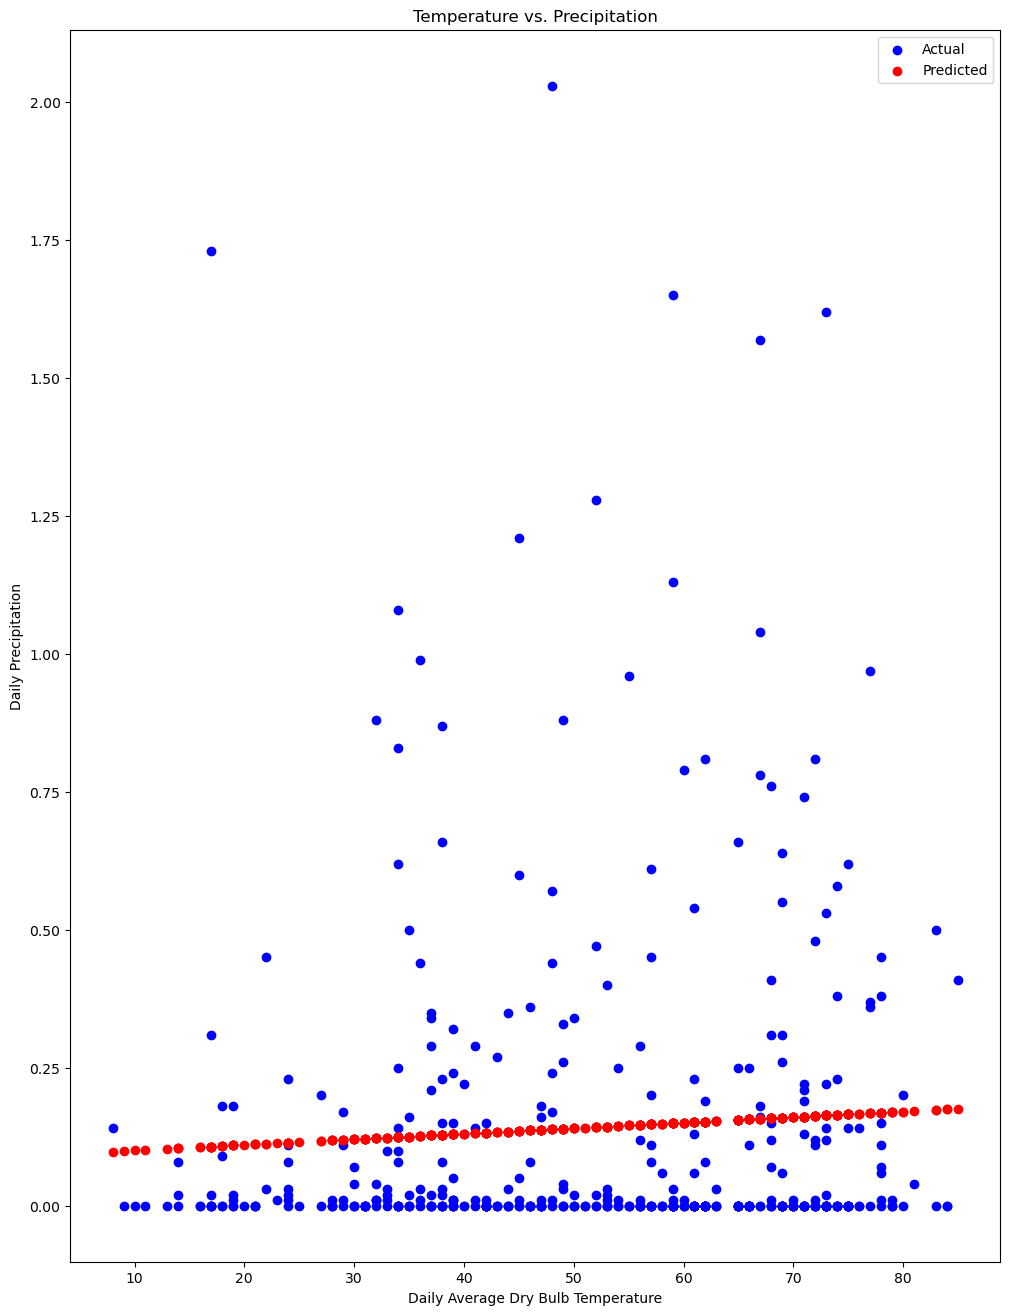

In [288]:
#Plot the true vs. predicted values.
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 16))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Daily Average Dry Bulb Temperature')
plt.ylabel('Daily Precipitation')
plt.title('Temperature vs. Precipitation')
plt.legend()
plt.show()

### Predict Humidity based on Temperature:
X (Feature): DailyAverageDryBulbTemperature
Y (Target): DailyAverageRelativeHumidity
### Predict Wind Speed based on Pressure:
X (Feature): DailyAverageStationPressure
Y (Target): DailyAverageWindSpeed

In [290]:
#Hum Vs Temp feature and target Variables
X_Hum=data[['DailyAverageDryBulbTemperature']]
y_Hum=data['DailyAverageRelativeHumidity']
#Wind Vs pressure feature and target Variables
X_wind=data[['DailyAverageStationPressure']]
y_wind=data['DailyAverageWindSpeed']
X_Hum

,DailyAverageDryBulbTemperature
0,25.0
2,27.0
3,39.0
5,13.0
8,20.0
...,...
2663,70.0
2664,68.0
2665,66.0
2666,72.0


### #for Hum vs tempeature

### Split the data for training and testing
### Train the Model
### Make predictions
### Evaluate the model

Mean Squared Error: 169.72874942927862
R-squared: 0.01825311278590347


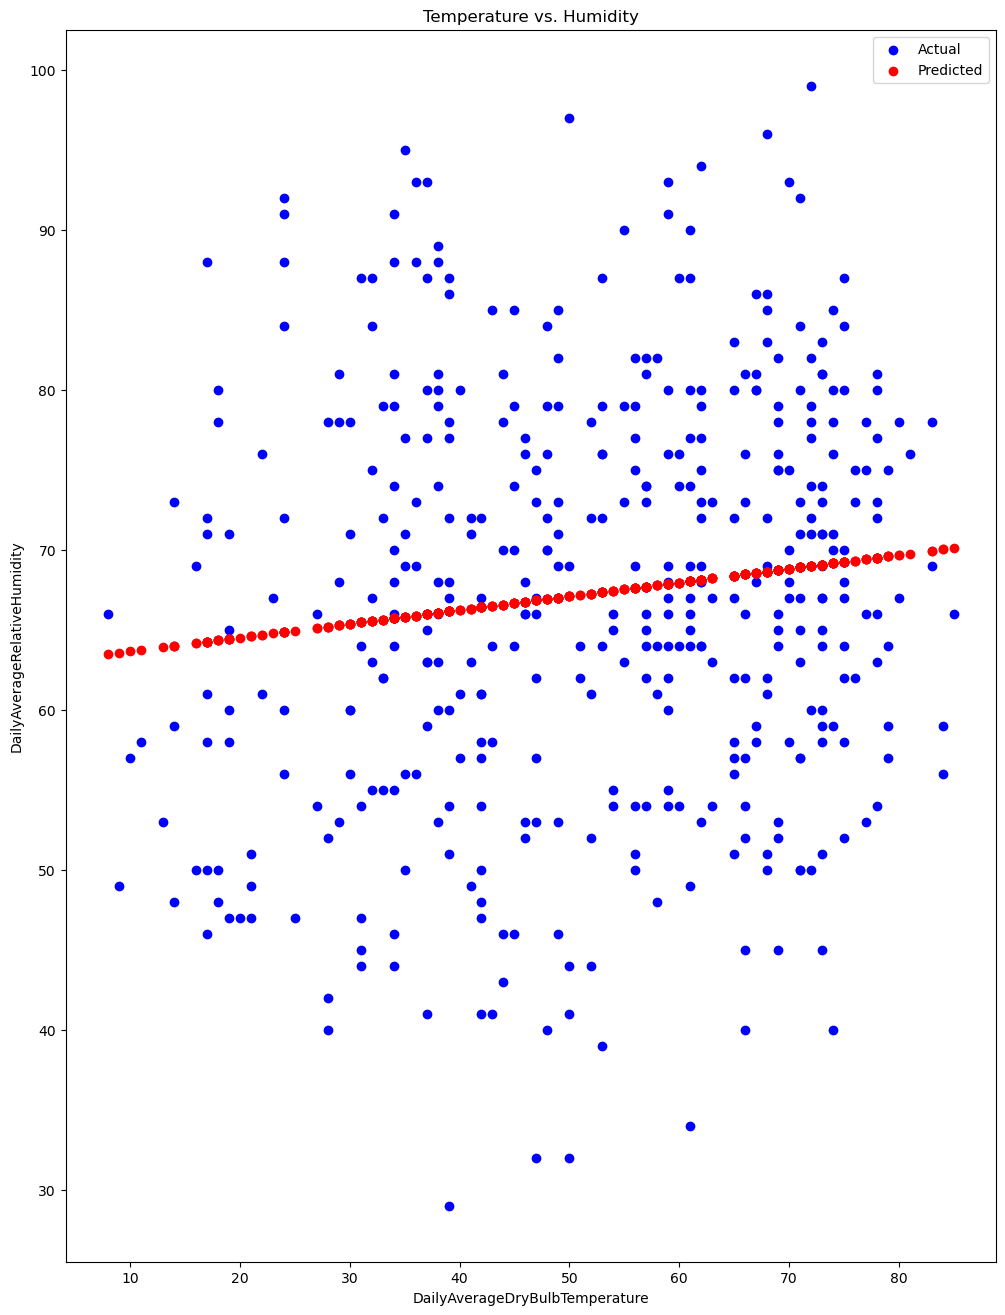

In [293]:
#split
X_train, X_test, y_train, y_test = train_test_split(X_Hum, y_Hum, test_size=0.2, random_state=32)
X_train.shape
X_test.shape
#train the model
modelHum=LinearRegression()
modelHum.fit(X_train,y_train)
#make the predication
y_HumPredicate=modelHum.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_HumPredicate)
r2 = r2_score(y_test, y_HumPredicate)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

#Plot the true vs. predicted values.
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 16))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_HumPredicate, color='red', label='Predicted')
plt.xlabel('DailyAverageDryBulbTemperature')
plt.ylabel('DailyAverageRelativeHumidity')
plt.title('Temperature vs. Humidity')
plt.legend()
#plt.show()

### for Predict Wind Speed based on Pressure:

In [295]:
#split
X_train,X_test,y_train,y_test=train_test_split(X_wind,y_wind,test_size=0.2,random_state=40)
#tain the model
modelWind=LinearRegression()
modelWind.fit(X_train,y_train)

#predication
y_windPre=modelWind.predict(X_test)

#evaluet score
mse=mean_squared_error(y_test,y_windPre)
r2=r2_score(y_test,y_windPre)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 10.916915393797325
R-squared: 0.07845155215045851


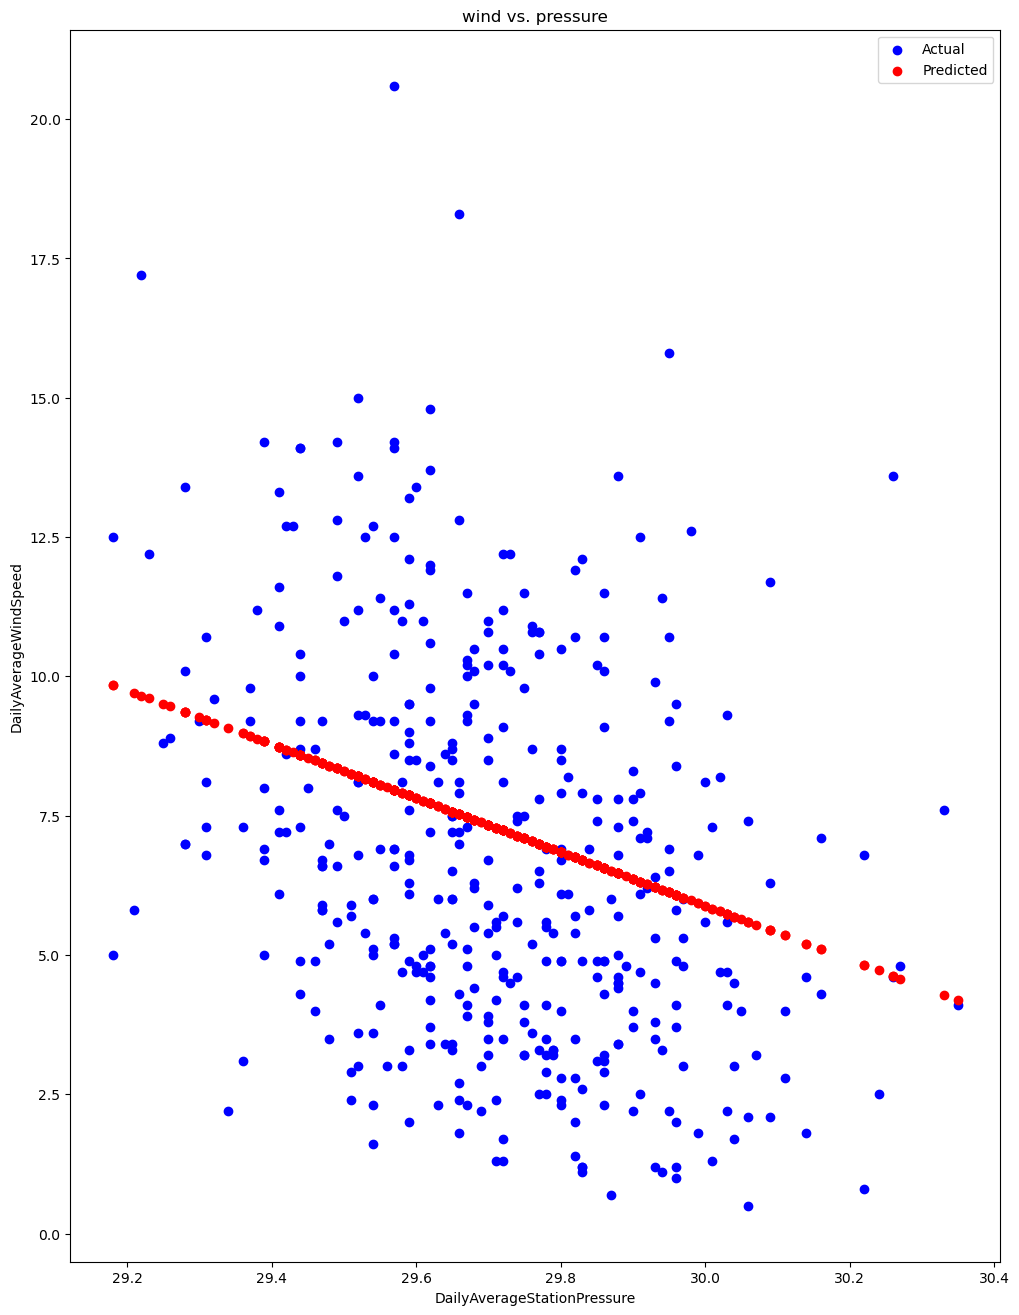

In [296]:
#Plot the true vs. predicted values.
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 16))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_windPre, color='red', label='Predicted')
#X (Feature): DailyAverageStationPressure Y (Target): DailyAverageWindSpeed
plt.xlabel('DailyAverageStationPressure')
plt.ylabel('DailyAverageWindSpeed')
plt.title('wind vs. pressure')
plt.legend()
plt.show()

In [297]:
from scipy.stats import linregress
# Calculate summary statistics
summary_stats = data.describe()

# Trend Analysis: Linear regression for temperature
x = np.arange(len(data))
y_temp = data['DailyAverageDryBulbTemperature'].values
slope_temp, intercept_temp, r_value_temp, p_value_temp, std_err_temp = linregress(x, y_temp)
data['LinearTrendTemperature'] = intercept_temp + slope_temp * x

# Trend Analysis: Linear regression for precipitation
y_precip = data['DailyPrecipitation'].values
slope_precip, intercept_precip, r_value_precip, p_value_precip, std_err_precip = linregress(x, y_precip)
data['LinearTrendPrecipitation'] = intercept_precip + slope_precip * x

# Trend Analysis: Linear regression for wind speed
y_wind = data['DailyAverageWindSpeed'].values
slope_wind, intercept_wind, r_value_wind, p_value_wind, std_err_wind = linregress(x, y_wind)
data['LinearTrendWindSpeed'] = intercept_wind + slope_wind * x

# Print Linear Regression Details
print(f"Temperature Trend: Slope: {slope_temp:.4f}, Intercept: {intercept_temp:.4f}, R-squared: {r_value_temp**2:.4f}, P-value: {p_value_temp:.2f}")
print(f"Precipitation Trend: Slope: {slope_precip:.4f}, Intercept: {intercept_precip:.4f}, R-squared: {r_value_precip**2:.4f}, P-value: {p_value_precip:.4f}")
print(f"Wind Speed Trend: Slope: {slope_wind:.4f}, Intercept: {intercept_wind:.4f}, R-squared: {r_value_wind**2:.4f}, P-value: {p_value_wind:.4f}")

print(summary)

Temperature Trend: Slope: -0.0023, Intercept: 54.2644, R-squared: 0.0060, P-value: 0.00
Precipitation Trend: Slope: 0.0000, Intercept: 0.1337, R-squared: 0.0002, P-value: 0.5654
Wind Speed Trend: Slope: 0.0001, Intercept: 7.0825, R-squared: 0.0002, P-value: 0.5617

Key Findings:
1. **Temperature Trends**:
   - The average daily temperature shows a statistically significant trend.
   - Slope: -0.0023 °F per day, Intercept: 54.2644 °F
   - R-squared: 0.0060, P-value: 3.4734e-04

2. **Precipitation Trends**:
   - The average daily precipitation trend analysis indicates:
   - Slope: 0.0000 inches per day, Intercept: 0.1337 inches
   - R-squared: 0.0002, P-value: 5.6539e-01

3. **Wind Speed Trends**:
   - The average daily wind speed shows:
   - Slope: 0.0001 mph per day, Intercept: 7.0825 mph
   - R-squared: 0.0002, P-value: 5.6166e-01

4. **Summary Statistics**:
   - Mean Daily Temperature: 51.81 °F
   - Mean Daily Precipitation: 0.14 inches
   - Mean Daily Wind Speed: 7.16 mph



C:\Users\lsrin\AppData\Local\Temp\ipykernel_7028\3742493263.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LinearTrendTemperature'] = intercept_temp + slope_temp * x
C:\Users\lsrin\AppData\Local\Temp\ipykernel_7028\3742493263.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LinearTrendPrecipitation'] = intercept_precip + slope_precip * x
C:\Users\lsrin\AppData\Local\Temp\ipykernel_7028\3742493263.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

### Multiple Linear Regression Implementation:
X_feature are all Except the DailyAverageDryBuldTemperature

In [299]:
#columns_to_drop = ['STATION', 'DATE','SOURCE','REPORT_TYPE','BackupElements','BackupElevation', 'Sunrise', 'Sunset', 'WindEquipmentChangeDate'] #removing these columns
#data_clean = data.drop(columns=columns_to_drop)

first_10_columns = data.iloc[:, 0:10]
print(first_10_columns.columns)
# Remove these columns from the original DataFrame
data_clean = data.drop(columns=first_10_columns, axis=1)
data_cleaned=data_clean.drop(columns=['Sunrise', 'Sunset', 'WindEquipmentChangeDate'],axis=1)
print(data_cleaned.columns)

Index(['STATION', 'DATE', 'REPORT_TYPE', 'SOURCE', 'BackupElements',
       'BackupElevation', 'BackupEquipment', 'BackupLatitude',
       'BackupLongitude', 'BackupName'],
      dtype='object')
Index(['DailyAverageDewPointTemperature', 'DailyAverageDryBulbTemperature',
       'DailyAverageRelativeHumidity', 'DailyAverageSeaLevelPressure',
       'DailyAverageStationPressure', 'DailyAverageWetBulbTemperature',
       'DailyAverageWindSpeed', 'DailyCoolingDegreeDays',
       'DailyDepartureFromNormalAverageTemperature', 'DailyHeatingDegreeDays',
       'DailyMaximumDryBulbTemperature', 'DailyMinimumDryBulbTemperature',
       'DailyPeakWindDirection', 'DailyPeakWindSpeed', 'DailyPrecipitation',
       'DailySnowDepth', 'DailySnowfall', 'DailySustainedWindDirection',
       'DailySustainedWindSpeed', 'LinearTrendTemperature',
       'LinearTrendPrecipitation', 'LinearTrendWindSpeed'],
      dtype='object')


In [300]:
# Assuming your DataFrame is named 'data'
print(data_cleaned.dtypes)
data_cleaned=data_cleaned

DailyAverageDewPointTemperature               float64
DailyAverageDryBulbTemperature                float64
DailyAverageRelativeHumidity                  float64
DailyAverageSeaLevelPressure                  float64
DailyAverageStationPressure                   float64
DailyAverageWetBulbTemperature                float64
DailyAverageWindSpeed                         float64
DailyCoolingDegreeDays                        float64
DailyDepartureFromNormalAverageTemperature    float64
DailyHeatingDegreeDays                        float64
DailyMaximumDryBulbTemperature                float64
DailyMinimumDryBulbTemperature                float64
DailyPeakWindDirection                        float64
DailyPeakWindSpeed                            float64
DailyPrecipitation                            float64
DailySnowDepth                                 object
DailySnowfall                                  object
DailySustainedWindDirection                   float64
DailySustainedWindSpeed     

In [301]:
# Convert 'DailySnowDepth' and 'DailySnowfall' to float, forcing errors to NaN
data_cleaned['DailySnowDepth'] = pd.to_numeric(data_cleaned['DailySnowDepth'], errors='coerce')
data_cleaned['DailySnowfall'] = pd.to_numeric(data_cleaned['DailySnowfall'], errors='coerce')


print("the data before checked",data_cleaned.isna().sum())  # This should show 0 for float columns

float_columns=data_cleaned.select_dtypes(include=['float64']).columns
data_cleaned[float_columns]=data_cleaned[float_columns].fillna(data_cleaned[float_columns].mean())

print("the data after checked",data_cleaned.isna().sum())  # This should show 0 for float columns

the data before checked DailyAverageDewPointTemperature                0
DailyAverageDryBulbTemperature                 0
DailyAverageRelativeHumidity                   0
DailyAverageSeaLevelPressure                   0
DailyAverageStationPressure                    0
DailyAverageWetBulbTemperature                 0
DailyAverageWindSpeed                          0
DailyCoolingDegreeDays                         0
DailyDepartureFromNormalAverageTemperature     0
DailyHeatingDegreeDays                         0
DailyMaximumDryBulbTemperature                 0
DailyMinimumDryBulbTemperature                 0
DailyPeakWindDirection                         0
DailyPeakWindSpeed                             0
DailyPrecipitation                             0
DailySnowDepth                                53
DailySnowfall                                 87
DailySustainedWindDirection                    0
DailySustainedWindSpeed                        0
LinearTrendTemperature                       

In [303]:
# Step 1: Define Features (X) and Target (y)

X = data_cleaned.drop('DailyAverageDryBulbTemperature', axis=1)  # Features (all except target)
y = data_cleaned['DailyAverageDryBulbTemperature']  # Target (temperature)

# Step 2:Split the test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Step 3: Train the Multiple Linear Regression Model
modelMultiLinear = LinearRegression()
modelMultiLinear.fit(X_train, y_train)

# Step 4: Model Coefficients and Intercept
print("Coefficients:", modelMultiLinear.coef_)  # Coefficients for each feature
print("Intercept:", modelMultiLinear.intercept_)  # Intercept value

# Step 9: Predict on Test Data
y_pred = modelMultiLinear.predict(X_test)



from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
r2 = r2_score(y_test, y_pred)  # R-squared score
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error

print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Coefficients: [-7.00584299e-16  1.50556277e-16  6.70953973e-14 -7.13015384e-14
  2.80033917e-15 -2.80911793e-16  1.00000000e+00  1.60464224e-16
 -1.00000000e+00  1.22667089e-15  1.07598307e-15  1.07361345e-16
 -5.88673742e-17 -1.37771934e-15 -2.23506642e-16  1.68100148e-16
 -1.12454202e-16 -2.78473781e-16 -3.50217722e-17 -1.99532299e-18
  1.17001060e-16]
Intercept: 64.99999999999987
R² Score: 1.0
Mean Absolute Error: 5.233549442874512e-14
Root Mean Squared Error: 6.113196305717959e-14


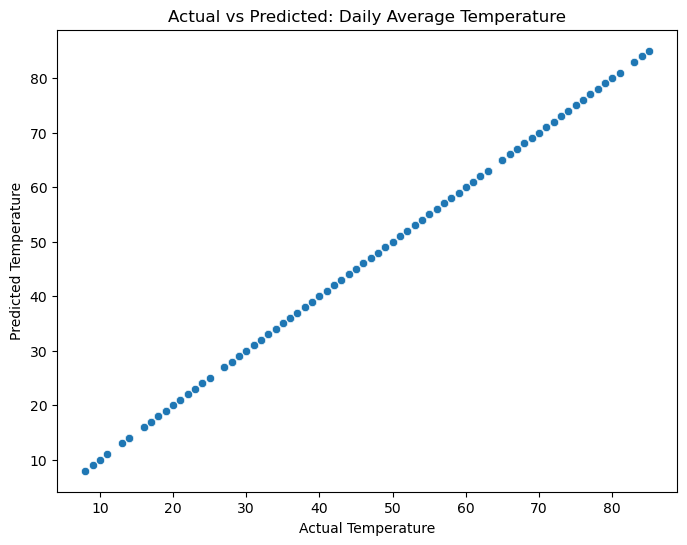

In [305]:
# Optional: Visualize Actual vs Predicted Values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted: Daily Average Temperature')
plt.show()

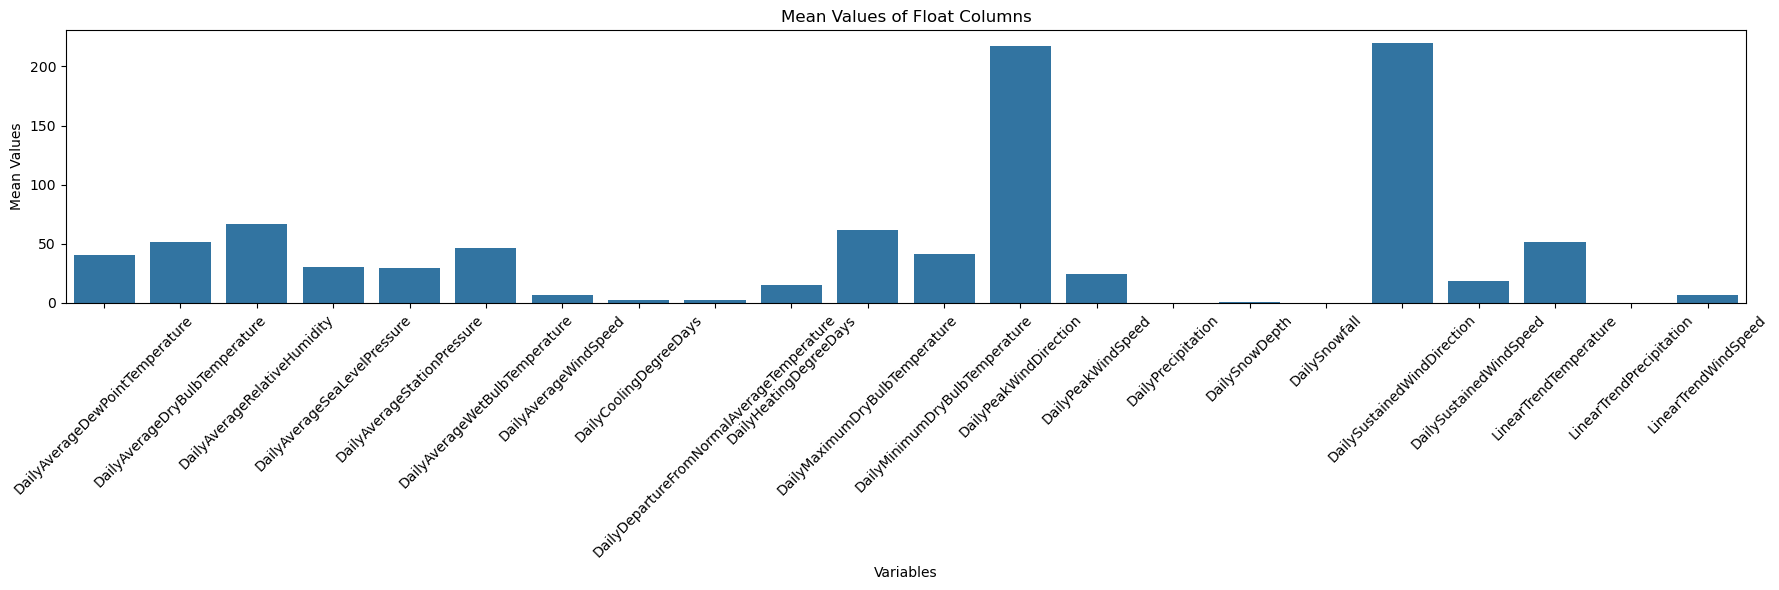

In [315]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate the mean of each float column
# Step 2: Create a bar plot
# Step 3: Add labels and title
mean_values = data_cleaned[float_columns].mean()

# Step 2: Create a bar plot
plt.figure(figsize=(18, 6))
sns.barplot(x=mean_values.index, y=mean_values.values)

plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.xlabel('Variables')
plt.ylabel('Mean Values')
plt.title('Mean Values of Float Columns')
plt.tight_layout()  # Adjust layout to fit labels


plt.show()
